In [1]:
from __future__ import division
import numpy as np
from scipy.interpolate import barycentric_interpolate
import matplotlib.pyplot as plt
import scipy.linalg as la

%matplotlib inline

def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

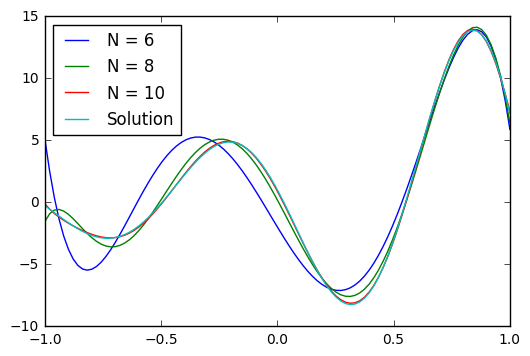

In [2]:
u = lambda x : np.exp(x)*np.cos(6*x)
du = lambda x : -6*np.exp(x)*np.sin(6*x) + np.exp(x)*np.cos(6*x)
dom = np.linspace(-1,1,100)

for N in [6,8,10]:
    D,x = cheb(N)
    y = barycentric_interpolate(x, D.dot(u(x)), dom)
    plt.plot(dom,y, label="N = " + str(N))
    
plt.plot(dom, du(dom), label="Solution")
plt.legend(loc="upper left")
plt.show()

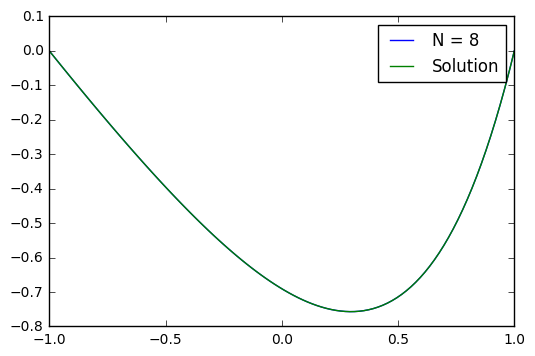

In [3]:
#The following code will force U[0] = U[N] = 0
D, x = cheb(N) #for some N
D2 = np.dot(D, D)
D2[0,:], D2[-1,:] = 0, 0
D2[0,0], D2[-1,-1] = 1, 1

F = np.exp(2*x)
F[0], F[-1] = 0, 0

u = lambda x : ( -np.cosh(2) - np.sinh(2)*x + np.exp(2*x)) / 4

U = la.solve(D2, F)

y = barycentric_interpolate(x, U, dom)
plt.plot(dom, y, label="N = 8")
plt.plot(dom, u(dom), label="Solution")
plt.legend()
plt.show()

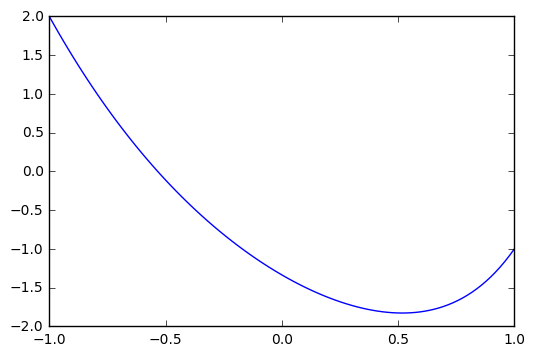

In [4]:
N = 8
D, x = cheb(N) #for some N
D2 = np.dot(D, D)
L = D2 + D
L[0,:], L[-1,:] = 0, 0
L[0,0], L[-1,-1] = 1, 1

F = np.exp(3*x)
F[0], F[-1] = -1, 2

U = la.solve(L,F)

y = barycentric_interpolate(x, U, dom)

plt.plot(dom, y)
plt.show()

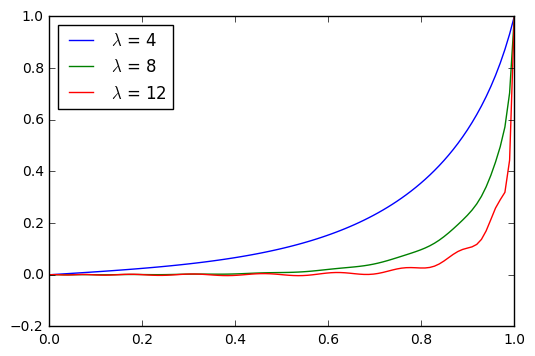

In [5]:
from scipy.optimize import root

N = 20
D, x = cheb(N)

def F(U, lmda):
    D2 = np.dot(D, D)
    D2[0,:], D2[-1,:] = 0, 0
    D2[0,0], D2[-1,-1] = 1, 1
    
    out = 4*D2.dot(U) - lmda*np.sinh(lmda*U)

    out[0] = U[0] - 1
    out[-1] = U[-1]
    
    return out

for lmda in [4,8,12]:
    solution = root(F, np.ones(21), args=(lmda)).x
    y = barycentric_interpolate(x, solution, np.linspace(-1,1,100))
    
    plt.plot(np.linspace(0,1,100), y, label="$\lambda$ = " + str(lmda))

plt.legend(loc="upper left")
plt.show()

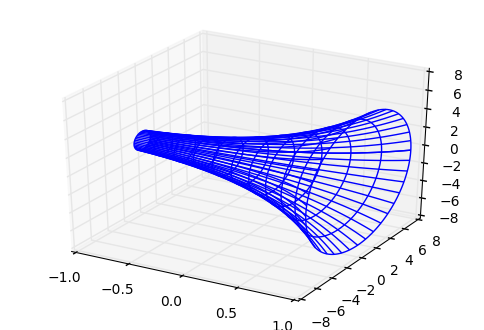

In [39]:
from mpl_toolkits.mplot3d import Axes3D

N = 50
D, x = cheb(N)

def F(U, lmda):
    D2 = np.dot(D, D)
    D2[0,:], D2[-1,:] = 0, 0
    D2[0,0], D2[-1,-1] = 1, 1
    
    out = U*D2.dot(U) - D.dot(U)*D.dot(U) - np.ones(U.shape[0])

    out[0] = U[0] - 7
    out[-1] = U[-1] - 1
    
    return out

# this is y
solution = root(F, 2*np.ones(51), args=(lmda)).x

# y' is D.dot(solution)
# Then plug into the formula
barycentric = barycentric_interpolate(x, solution, np.linspace(-1,1,100))

lin = np.linspace(-1, 1, 100)
theta = np.linspace(0,2*np.pi,401)
X, T = np.meshgrid(lin, theta)
Y, Z = barycentric*np.cos(T), barycentric*np.sin(T)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()

In [29]:
print "Surface area =", np.sum(barycentric*2*np.pi*(2/100))
y = solution
Dy = D.dot(solution)
np.sum(2*np.pi*y[:-1]*np.sqrt(1 + Dy[:-1]**2)*(np.abs(x[1:]-x[:-1])))

Surface area = 36.2596940755


164.11064887411914

In [31]:
9*np.pi*2

56.548667764616276